# Visualizing and Evaluating Trained Autoencoders

In [32]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from LSTM_Autoencoder import LSTMAutoencoder
from pathlib import Path
import os

### Apple Model:

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
appl_model = LSTMAutoencoder().to(device)

model_path = Path("../../models/lstm/aapl_lstm_autoencoder.pth")
appl_model.load_state_dict(torch.load(model_path, map_location=device))
appl_model.eval()

# Load the data
data = pd.read_csv("../../data/sequences_ready/AAPL_data_sequences.csv")
data = data.values.reshape(-1, 30, 5)
tensor_data = torch.tensor(data, dtype=torch.float32)

In [34]:
appl_model.eval()
with torch.no_grad():
    output = appl_model(tensor_data.to(device)).cpu().numpy()

# Plot the results
reconstructed_close = output[:, -1, 0]
real_close = tensor_data[:, -1, 0].numpy()

# RMSE
reconstruction_error = (real_close - reconstructed_close) ** 2

In [35]:
# Original data for datetime
original_data = pd.read_csv("../../data/processed_data/AAPL_data.csv")
dates = pd.to_datetime(original_data["Date"], utc=True)

aligned_dates = dates[29:29 + len(tensor_data)].reset_index(drop=True)

In [36]:
# 5% threshold for anomalies
threshold = np.percentile(reconstruction_error, 97)
anomalies = reconstruction_error > threshold

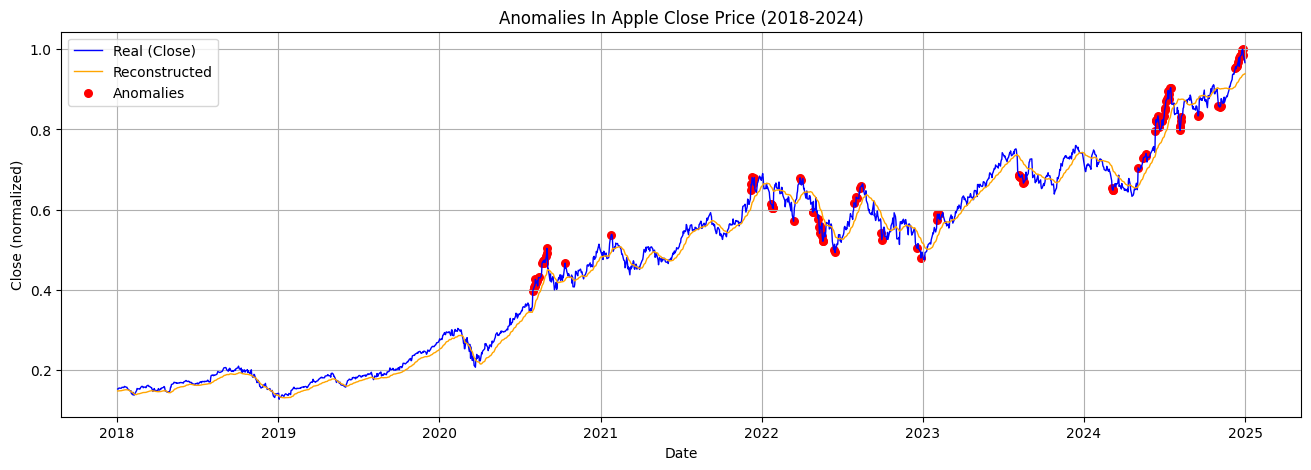

In [37]:
# Which years to plot
start_year = 2018
end_year = 2024

mask = (aligned_dates.dt.year >= start_year) & (aligned_dates.dt.year <= end_year)

plot_dates = aligned_dates[mask]
plot_real_close = real_close[mask]
plot_reconstructed_close = reconstructed_close[mask]

plt.figure(figsize=(16, 5))

plt.plot(plot_dates, plot_real_close, label="Real (Close)", color='blue', linewidth=1)
plt.plot(plot_dates, plot_reconstructed_close, label="Reconstructed", color='orange', linewidth=1)

plt.scatter(
    plot_dates[anomalies[mask]],
    plot_real_close[anomalies[mask]],
    color='red',
    marker='o',
    s=30,
    label="Anomalies"
)

plt.title(f"Anomalies In Apple Close Price ({start_year}-{end_year})")
plt.xlabel("Date")
plt.ylabel("Close (normalized)")
plt.legend()
plt.grid()
plt.show()


In [38]:
print(f"Reconstruction error: {reconstruction_error.mean()}")

Reconstruction error: 0.00027975381817668676


### Google Model:

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
googl_model = LSTMAutoencoder().to(device)

model_path = Path("../../models/lstm/googl_lstm_autoencoder.pth")
googl_model.load_state_dict(torch.load(model_path, map_location=device))
googl_model.eval()

# Load the data
data = pd.read_csv("../../data/sequences_ready/GOOGL_data_sequences.csv")
data = data.values.reshape(-1, 30, 5)
tensor_data = torch.tensor(data, dtype=torch.float32)

In [40]:
googl_model.eval()
with torch.no_grad():
    output = googl_model(tensor_data.to(device)).cpu().numpy()

# Plot the results
reconstructed_close = output[:, -1, 0]
real_close = tensor_data[:, -1, 0].numpy()

# RMSE
reconstruction_error = (real_close - reconstructed_close) ** 2

In [41]:
# Original data for datetime
original_data = pd.read_csv("../../data/processed_data/GOOGL_data.csv")
dates = pd.to_datetime(original_data["Date"], utc=True)

aligned_dates = dates[29:29 + len(tensor_data)].reset_index(drop=True)

In [42]:
# 5% threshold for anomalies
threshold = np.percentile(reconstruction_error, 97)
anomalies = reconstruction_error > threshold

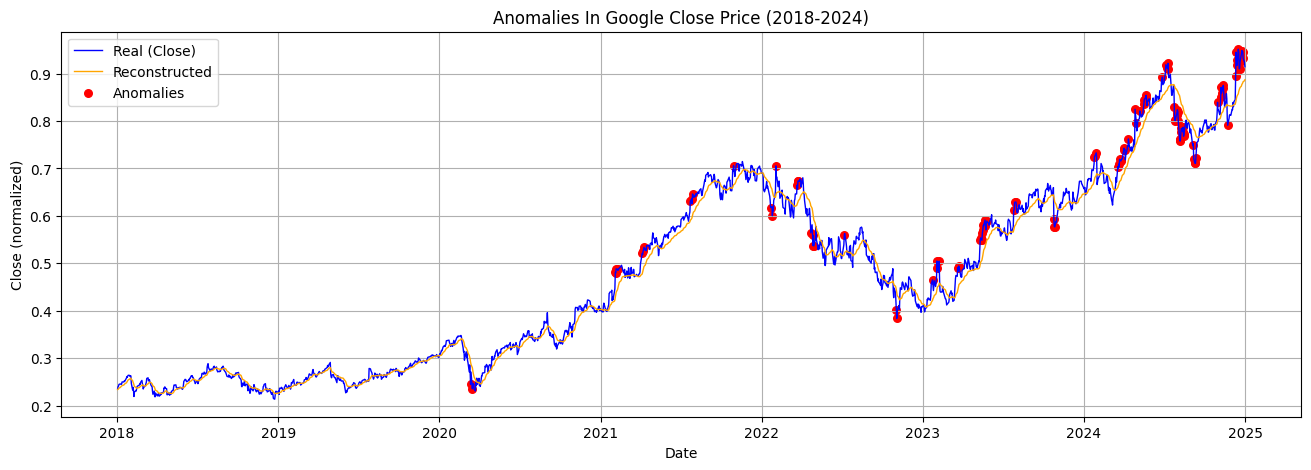

In [43]:
# Which years to plot
start_year = 2018
end_year = 2024

mask = (aligned_dates.dt.year >= start_year) & (aligned_dates.dt.year <= end_year)

plot_dates = aligned_dates[mask]
plot_real_close = real_close[mask]
plot_reconstructed_close = reconstructed_close[mask]

plt.figure(figsize=(16, 5))

plt.plot(plot_dates, plot_real_close, label="Real (Close)", color='blue', linewidth=1)
plt.plot(plot_dates, plot_reconstructed_close, label="Reconstructed", color='orange', linewidth=1)

plt.scatter(
    plot_dates[anomalies[mask]],
    plot_real_close[anomalies[mask]],
    color='red',
    marker='o',
    s=30,
    label="Anomalies"
)

plt.title(f"Anomalies In Google Close Price ({start_year}-{end_year})")
plt.xlabel("Date")
plt.ylabel("Close (normalized)")
plt.legend()
plt.grid()
plt.show()


In [44]:
print(f"Reconstruction error: {reconstruction_error.mean()}")

Reconstruction error: 0.0002162851596949622


### Microsoft Model:

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
msft_model = LSTMAutoencoder().to(device)

model_path = Path("../../models/lstm/msft_lstm_autoencoder.pth")
msft_model.load_state_dict(torch.load(model_path, map_location=device))
msft_model.eval()

# Load the data
data = pd.read_csv("../../data/sequences_ready/MSFT_data_sequences.csv")
data = data.values.reshape(-1, 30, 5)
tensor_data = torch.tensor(data, dtype=torch.float32)

In [46]:
msft_model.eval()
with torch.no_grad():
    output = msft_model(tensor_data.to(device)).cpu().numpy()

# Plot the results
reconstructed_close = output[:, -1, 0]
real_close = tensor_data[:, -1, 0].numpy()

# RMSE
reconstruction_error = (real_close - reconstructed_close) ** 2

In [47]:
# Original data for datetime
original_data = pd.read_csv("../../data/processed_data/MSFT_data.csv")
dates = pd.to_datetime(original_data["Date"], utc=True)

aligned_dates = dates[29:29 + len(tensor_data)].reset_index(drop=True)

In [48]:
# 5% threshold for anomalies
threshold = np.percentile(reconstruction_error, 97)
anomalies = reconstruction_error > threshold

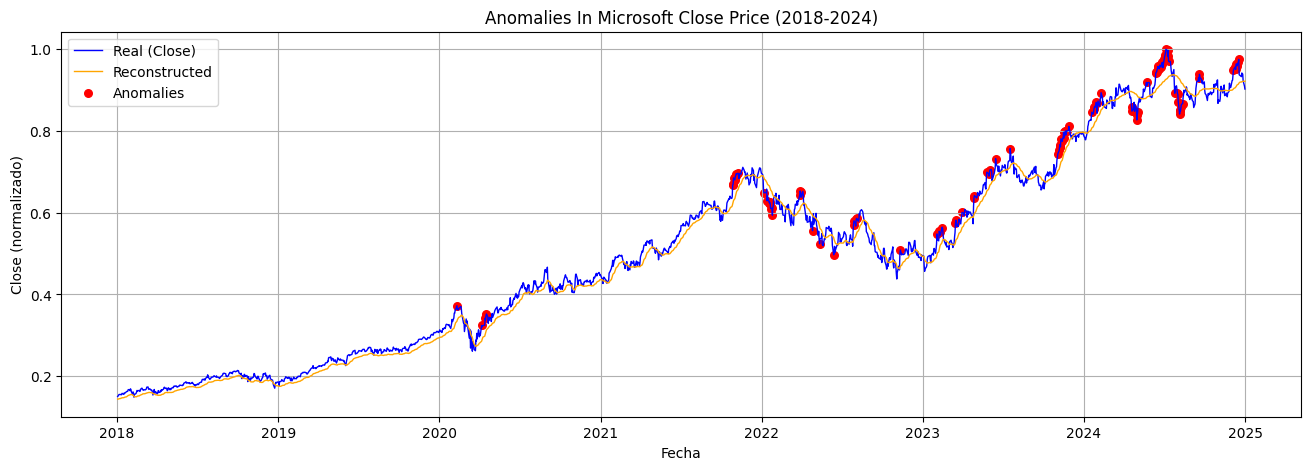

In [49]:
# Which years to plot
start_year = 2018
end_year = 2024

mask = (aligned_dates.dt.year >= start_year) & (aligned_dates.dt.year <= end_year)

plot_dates = aligned_dates[mask]
plot_real_close = real_close[mask]
plot_reconstructed_close = reconstructed_close[mask]

plt.figure(figsize=(16, 5))

plt.plot(plot_dates, plot_real_close, label="Real (Close)", color='blue', linewidth=1)
plt.plot(plot_dates, plot_reconstructed_close, label="Reconstructed", color='orange', linewidth=1)

plt.scatter(
    plot_dates[anomalies[mask]],
    plot_real_close[anomalies[mask]],
    color='red',
    marker='o',
    s=30,
    label="Anomalies"
)

plt.title(f"Anomalies In Microsoft Close Price ({start_year}-{end_year})")
plt.xlabel("Fecha")
plt.ylabel("Close (normalizado)")
plt.legend()
plt.grid()
plt.show()


In [50]:
print(f"Reconstruction error: {reconstruction_error.mean()}")

Reconstruction error: 0.0001986928837141022


### Ndivia Model:

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nvda_model = LSTMAutoencoder().to(device)

model_path = Path("../../models/lstm/nvda_lstm_autoencoder.pth")
nvda_model.load_state_dict(torch.load(model_path, map_location=device))
nvda_model.eval()

# Load the data
data = pd.read_csv("../../data/sequences_ready/NVDA_data_sequences.csv")
data = data.values.reshape(-1, 30, 5)
tensor_data = torch.tensor(data, dtype=torch.float32)

In [52]:
nvda_model.eval()
with torch.no_grad():
    output = msft_model(tensor_data.to(device)).cpu().numpy()

# Plot the results
reconstructed_close = output[:, -1, 0]
real_close = tensor_data[:, -1, 0].numpy()

# RMSE
reconstruction_error = (real_close - reconstructed_close) ** 2

In [53]:
# Original data for datetime
original_data = pd.read_csv("../../data/processed_data/NVDA_data.csv")
dates = pd.to_datetime(original_data["Date"], utc=True)

aligned_dates = dates[29:29 + len(tensor_data)].reset_index(drop=True)

In [54]:
# 5% threshold for anomalies
threshold = np.percentile(reconstruction_error, 97)
anomalies = reconstruction_error > threshold

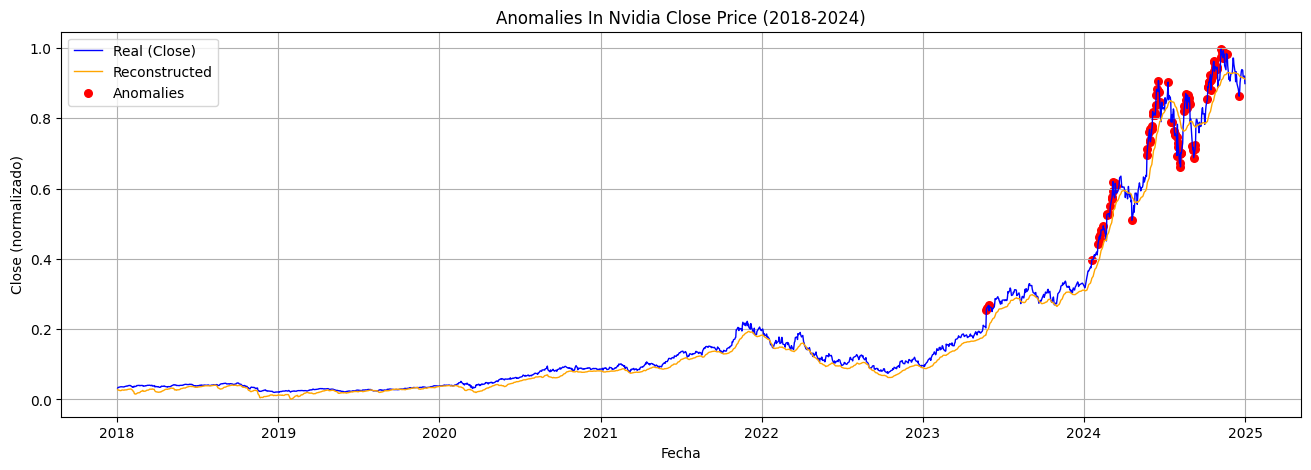

In [55]:
# Which years to plot
start_year = 2018
end_year = 2024

mask = (aligned_dates.dt.year >= start_year) & (aligned_dates.dt.year <= end_year)

plot_dates = aligned_dates[mask]
plot_real_close = real_close[mask]
plot_reconstructed_close = reconstructed_close[mask]

plt.figure(figsize=(16, 5))

plt.plot(plot_dates, plot_real_close, label="Real (Close)", color='blue', linewidth=1)
plt.plot(plot_dates, plot_reconstructed_close, label="Reconstructed", color='orange', linewidth=1)

plt.scatter(
    plot_dates[anomalies[mask]],
    plot_real_close[anomalies[mask]],
    color='red',
    marker='o',
    s=30,
    label="Anomalies"
)

plt.title(f"Anomalies In Nvidia Close Price ({start_year}-{end_year})")
plt.xlabel("Fecha")
plt.ylabel("Close (normalizado)")
plt.legend()
plt.grid()
plt.show()


In [56]:
print(f"Reconstruction error: {reconstruction_error.mean()}")

Reconstruction error: 0.0003904864133801311


### Tesla Model:

In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tsla_model = LSTMAutoencoder().to(device)

model_path = Path("../../models/lstm/tsla_lstm_autoencoder.pth")
tsla_model.load_state_dict(torch.load(model_path, map_location=device))
tsla_model.eval()

# Load the data
data = pd.read_csv("../../data/sequences_ready/TSLA_data_sequences.csv")
data = data.values.reshape(-1, 30, 5)
tensor_data = torch.tensor(data, dtype=torch.float32)

In [58]:
tsla_model.eval()
with torch.no_grad():
    output = msft_model(tensor_data.to(device)).cpu().numpy()

# Plot the results
reconstructed_close = output[:, -1, 0]
real_close = tensor_data[:, -1, 0].numpy()

# RMSE
reconstruction_error = (real_close - reconstructed_close) ** 2

In [59]:
# Original data for datetime
original_data = pd.read_csv("../../data/processed_data/TSLA_data.csv")
dates = pd.to_datetime(original_data["Date"], utc=True)

aligned_dates = dates[29:29 + len(tensor_data)].reset_index(drop=True)

In [60]:
# 5% threshold for anomalies
threshold = np.percentile(reconstruction_error, 97)
anomalies = reconstruction_error > threshold

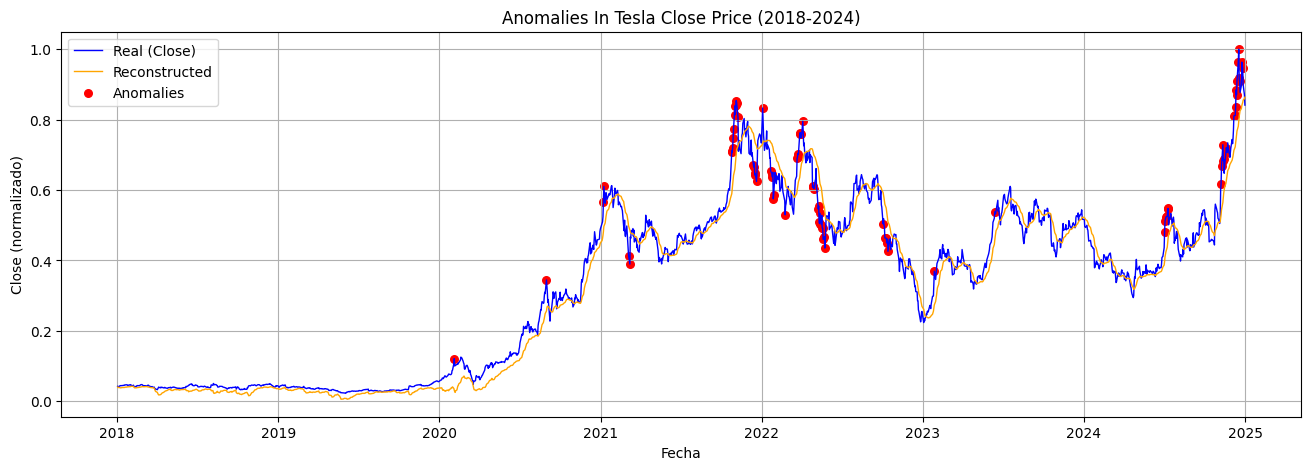

In [61]:
# Which years to plot
start_year = 2018
end_year = 2024

mask = (aligned_dates.dt.year >= start_year) & (aligned_dates.dt.year <= end_year)

plot_dates = aligned_dates[mask]
plot_real_close = real_close[mask]
plot_reconstructed_close = reconstructed_close[mask]

plt.figure(figsize=(16, 5))

plt.plot(plot_dates, plot_real_close, label="Real (Close)", color='blue', linewidth=1)
plt.plot(plot_dates, plot_reconstructed_close, label="Reconstructed", color='orange', linewidth=1)

plt.scatter(
    plot_dates[anomalies[mask]],
    plot_real_close[anomalies[mask]],
    color='red',
    marker='o',
    s=30,
    label="Anomalies"
)

plt.title(f"Anomalies In Tesla Close Price ({start_year}-{end_year})")
plt.xlabel("Fecha")
plt.ylabel("Close (normalizado)")
plt.legend()
plt.grid()
plt.show()


In [62]:
print(f"Reconstruction error: {reconstruction_error.mean()}")

Reconstruction error: 0.000849056348670274
